In [ ]:
# immport libraries
import sys
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.utils import to_categorical
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dropout
from keras.layers import BatchNormalization
import numpy as np 

import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [ ]:
# Load the Data

(X_train, y_train), (X_test, y_test) = cifar10.load_data()

170508288/170498071 [==============================] - 3s 0us/step


In [ ]:
# Look at the datatyoes of variables

print(type(X_train))
print(type(y_train))
print(type(X_test))
print(type(y_test))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [ ]:
# Get the Shape of dataset

print('X_train Shape :', X_train.shape)
print('X_test Shape :', X_test.shape)
print('y_train Shape :', y_train.shape)
print('y_test Shape :', y_test.shape)

X_train Shape : (50000, 32, 32, 3)
X_test Shape : (10000, 32, 32, 3)
y_train Shape : (50000, 1)
y_test Shape : (10000, 1)


In [ ]:
# Take a look at the first image as an array

index = 0
X_train[index]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

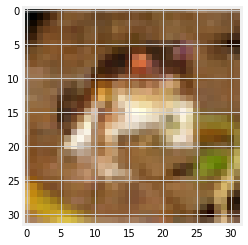

In [ ]:
# Show the image as a picture

img = plt.imshow(X_train[index])

In [ ]:
# Get the image label

print('The image label is : ', y_train[index])

The image label is :  [6]


In [ ]:
# Get the image classification
classification = ['airplane', 'autombile', 'bird', 'cat', 'deer', 'dog', 'frong', 'horse', 'ship', 'turck']

# print the image class
print('the image class is :', classification[y_train[index][0]])

the image class is : frong


In [ ]:
# Convert the label into set of 10 numbers to input the neural network

y_train_one_hot = to_categorical(y_train)
y_test_one_hot = to_categorical(y_test)

In [ ]:
# print the new labels

print(y_train_one_hot)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 ...
 [0. 0. 0. ... 0. 0. 1.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]]


In [ ]:
# print the new label of new image/ picture above
print('the one hot label is : ', y_train_one_hot[index])

the one hot label is :  [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


In [ ]:
# Normalizes the pixel to be values between 0 and 1
X_train = X_train / 255
X_test = X_test / 255

In [ ]:
X_train[index]

array([[[0.23137255, 0.24313725, 0.24705882],
        [0.16862745, 0.18039216, 0.17647059],
        [0.19607843, 0.18823529, 0.16862745],
        ...,
        [0.61960784, 0.51764706, 0.42352941],
        [0.59607843, 0.49019608, 0.4       ],
        [0.58039216, 0.48627451, 0.40392157]],

       [[0.0627451 , 0.07843137, 0.07843137],
        [0.        , 0.        , 0.        ],
        [0.07058824, 0.03137255, 0.        ],
        ...,
        [0.48235294, 0.34509804, 0.21568627],
        [0.46666667, 0.3254902 , 0.19607843],
        [0.47843137, 0.34117647, 0.22352941]],

       [[0.09803922, 0.09411765, 0.08235294],
        [0.0627451 , 0.02745098, 0.        ],
        [0.19215686, 0.10588235, 0.03137255],
        ...,
        [0.4627451 , 0.32941176, 0.19607843],
        [0.47058824, 0.32941176, 0.19607843],
        [0.42745098, 0.28627451, 0.16470588]],

       ...,

       [[0.81568627, 0.66666667, 0.37647059],
        [0.78823529, 0.6       , 0.13333333],
        [0.77647059, 0

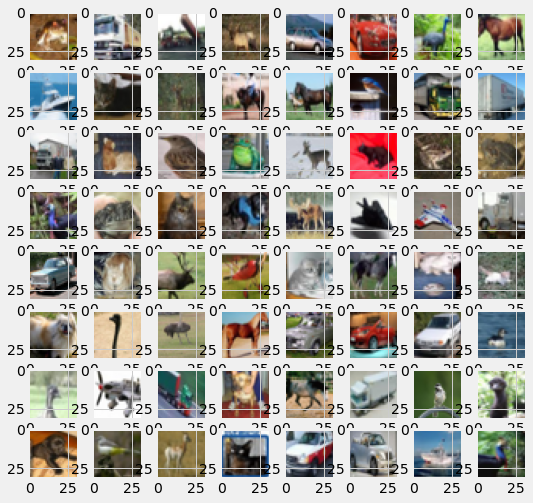

In [ ]:
# plotting first 64 images
fig = plt.figure(figsize=(8,8))

for i in range(64):
    ax = fig.add_subplot(8, 8, i+1)
    ax.imshow(X_train[i], cmap = plt.cm.bone)
plt.show()

In [ ]:
# define cnn model
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
model.add(BatchNormalization())

model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.2))

model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(BatchNormalization())

model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.3))

model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(BatchNormalization())

model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.4))

model.add(Conv2D(256, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(BatchNormalization())

model.add(Conv2D(256, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.4))

model.add(Flatten())
model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization_9 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
batch_normalization_10 (Batc (None, 32, 32, 32)        128       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 16, 16, 64)       

In [ ]:
#Compile model
opt = Adam(lr=0.001,decay=2e-4)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [ ]:
# create data generator
datagen = ImageDataGenerator(width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True)
# prepare iterator
it_train = datagen.flow(X_train, y_train_one_hot, batch_size=64)

In [ ]:
# fit model
steps = int(X_train.shape[0] / 64)
history = model.fit_generator(it_train, 
                              steps_per_epoch=steps, 
                              epochs=15, 
                              validation_data=(X_train, y_train_one_hot), 
                              verbose=1)

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1915: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/15
781/781 [==============================] - 764s 951ms/step - loss: 2.2253 - accuracy: 0.2828 - val_loss: 1.6253 - val_accuracy: 0.4418
Epoch 2/15
781/781 [==============================] - 780s 999ms/step - loss: 1.3938 - accuracy: 0.4969 - val_loss: 1.2442 - val_accuracy: 0.5768
Epoch 3/15
781/781 [==============================] - 786s 1s/step - loss: 1.1505 - accuracy: 0.5934 - val_loss: 0.9116 - val_accuracy: 0.6760
Epoch 4/15
781/781 [==============================] - 784s 1s/step - loss: 1.0062 - accuracy: 0.6463 - val_loss: 0.8470 - val_accuracy: 0.7054
Epoch 5/15
781/781 [==============================] - 750s 960ms/step - loss: 0.9065 - accuracy: 0.6884 - val_loss: 0.7889 - val_accuracy: 0.7242
Epoch 6/15
781/781 [==============================] - 741s 949ms/step - loss: 0.8269 - accuracy: 0.7159 - val_loss: 0.6264 - val_accuracy: 0.7815
Epoch 7/15
781/781 [==============================] - 744s 953ms/step - loss: 0.7697 - accuracy: 0.7357 - val_loss: 0.6270 - val_a

In [ ]:
# Evaluate the model using test data

model.evaluate(X_test, y_test_one_hot)[1]

313/313 [==============================] - 26s 83ms/step - loss: 0.4677 - accuracy: 0.8426


0.8425999879837036

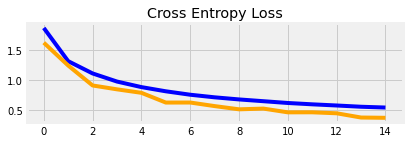

In [ ]:
# plot diagnostic learning curves

# plot loss
plt.subplot(211)
plt.title('Cross Entropy Loss')
plt.plot(history.history['loss'], color='blue', label='train')
plt.plot(history.history['val_loss'], color='orange', label='test')


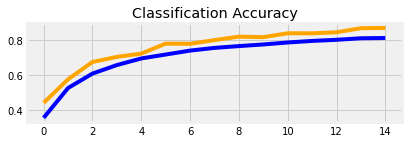

In [ ]:
# plot accuracy
plt.subplot(212)
plt.title('Classification Accuracy')
plt.plot(history.history['accuracy'], color='blue', label='train')
plt.plot(history.history['val_accuracy'], color='orange', label='test')


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: MatplotlibDeprecationWarning: Unrecognized location 'upper_left'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  


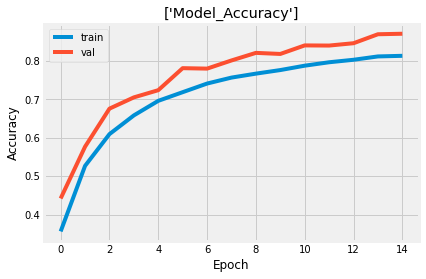

In [ ]:
# Visualize the model Accuracy

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title(['Model_Accuracy'])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['train', 'val'], loc = 'upper_left') 
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: MatplotlibDeprecationWarning: Unrecognized location 'upper_right'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  


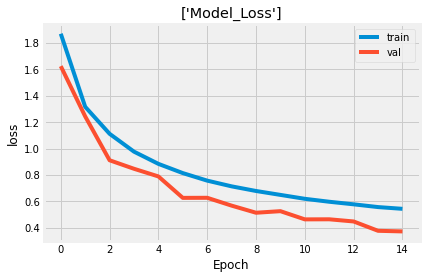

In [ ]:
# Visualize the model loss

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title(['Model_Loss'])
plt.xlabel('Epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'], loc = 'upper_right') 
plt.show()

In [ ]:
# text model with example

from google.colab import files
uploaded = files.upload()

Saving images.jpg to images.jpg


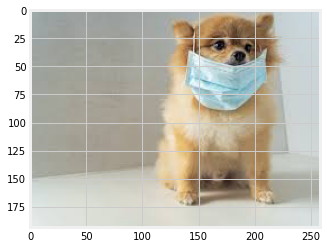

In [ ]:
# Show the image

new_image = plt.imread('images.jpg')
img = plt.imshow(new_image)

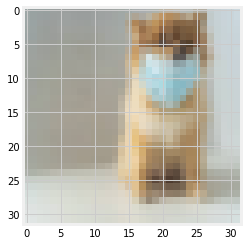

In [ ]:
# Resize the image

from skimage.transform import resize
resized_image = resize(new_image, (32,32,3))
img = plt.imshow(resized_image)

In [ ]:
# Get the model predictions

prediction = model.predict(np.array([resized_image]))

# Show predictios

prediction

array([[1.2984981e-04, 3.6952813e-05, 1.6036981e-03, 8.4029460e-01,
        3.0859145e-03, 1.4732806e-01, 8.0035202e-04, 5.1743551e-03,
        5.7500869e-04, 9.7120530e-04]], dtype=float32)

In [ ]:
# Sort the predictin from least to greatest

list_index = [0,1,2,3,4,5,6,7,8,9]

x = prediction

for i in range(10):
  for j in range(10):
    if x[0][list_index[i]] > x[0][list_index[j]]:
      temp = list_index[i]
      list_index[i] = list_index[j]
      list_index[j] = temp

# Show the sorted labels in order
print(list_index)

[3, 5, 7, 4, 2, 9, 6, 8, 0, 1]


In [ ]:
# Print first five predcitions
for i in range(10):
  print(classification[list_index[i]], ':', round(prediction[0][list_index[i]]* 100, 2), '%')

cat : 84.03 %
dog : 14.73 %
horse : 0.52 %
deer : 0.31 %
bird : 0.16 %
turck : 0.1 %
frong : 0.08 %
ship : 0.06 %
airplane : 0.01 %
autombile : 0.0 %
